In [1]:
####importing packages
import sys
sys.path.append('/work/mh0731/m300876/package')
import icons
from pathlib import Path
import importlib
import numpy as np
import xarray as xr
import intake
import dask
from distributed import Client, progress, wait
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt # Standard Plotting library
import seaborn as sns

In [2]:
icons.prepare_cpu(nworker=1,memory='256GB')

Number of CPUs: 256, number of threads: 256, number of workers: 1, processes: False


<Client: 'inproc://136.172.122.0/91515/1' processes=1 threads=256, memory=238.42 GiB>

In [3]:
def read_file(files):
    ## This function extract the cloud top height data set
    ### file :  file of the data set
    dataset = xr.open_mfdataset(files,engine='netcdf4',combine='by_coords',chunks=({'time':24}))
    return dataset

In [4]:
#Define a global pattern to find the files
glob_pattern_icon = 'dpp0066_hourly'
## Define the paths of file
data_path1 = Path('/work/mh0731/from_Mistral/mh0731/m300876/precip_paper/data/model/interpolation_01/dpp0066/precip_new/hourly')
## Collect all file names with pathlib's rglob and list compression  -- cloud liquid water 
file_icon = sorted([str(f) for f in data_path1.rglob(f'*{glob_pattern_icon}*.nc')])[:]

In [5]:
dset = read_file(file_icon)

In [6]:
pr_daily = (dset.pr.resample(time='1D').mean()*24*3600).compute()

In [7]:
resam = pr_daily.reindex_like(dset.pr).ffill('time')

In [8]:
## day with precip > 20 mm d-1 and hourly precip > than 0.1

In [9]:
pr_hourly_mask = (dset.pr.where((resam>=20) & (dset.pr*3600>=0.1)))*3600

In [10]:
pr_hourly_count = (pr_hourly_mask*0+1).resample(time='1D').sum().compute()

In [11]:
precipitation_hours_pdf_20_01, bin_edges = np.histogram(pr_hourly_count.where(pr_hourly_count>0), bins=np.arange(0,25,1),density=True)

In [12]:
## day with precip > 20 mm d-1 and hourly precip > than 0.83

In [13]:
pr_hourly_mask = (dset.pr.where((resam>=20) & (dset.pr*3600>=0.83)))*3600

In [14]:
pr_hourly_count = (pr_hourly_mask*0+1).resample(time='1D').sum().compute()

In [15]:
precipitation_hours_pdf_20_05, bin_edges = np.histogram(pr_hourly_count.where(pr_hourly_count>0), 
                                                        bins=np.arange(0,25,1),density=True)

In [16]:
## day with precip > 20 mm d-1 and hourly precip > than 1

In [17]:
pr_hourly_mask = (dset.pr.where((resam>=20) & (dset.pr*3600>=1)))*3600

In [18]:
pr_hourly_count = (pr_hourly_mask*0+1).resample(time='1D').sum().compute()

In [19]:
precipitation_hours_pdf_20_1, bin_edges = np.histogram(pr_hourly_count.where(pr_hourly_count>0), 
                                                        bins=np.arange(0,25,1),density=True)

In [20]:
## day with precip > 20 mm d-1 and and < 70 mm d-1 hourly precip > than 0.1

In [21]:
pr_hourly_mask = (dset.pr.where((resam>=20) & (resam<70) & (dset.pr*3600>=0.1)))*3600

In [22]:
pr_hourly_count = (pr_hourly_mask*0+1).resample(time='1D').sum().compute()

In [23]:
precipitation_hours_pdf_20_70_01, bin_edges = np.histogram(pr_hourly_count.where(pr_hourly_count>0), 
                                                        bins=np.arange(0,25,1),density=True)

In [24]:
## day with precip > 20 mm d-1 and and < 70 mm d-1 hourly precip > than 0.83

In [25]:
pr_hourly_mask = (dset.pr.where((resam>=20) & (resam<70) & (dset.pr*3600>=0.83)))*3600

In [26]:
pr_hourly_count = (pr_hourly_mask*0+1).resample(time='1D').sum().compute()

In [27]:
precipitation_hours_pdf_20_70_05, bin_edges = np.histogram(pr_hourly_count.where(pr_hourly_count>0), 
                                                        bins=np.arange(0,25,1),density=True)

In [28]:
## day with precip > 20 mm d-1 and and < 70 mm d-1 hourly precip > than 1

In [29]:
pr_hourly_mask = (dset.pr.where((resam>=20) & (resam<70) & (dset.pr*3600>=1)))*3600

In [30]:
pr_hourly_count = (pr_hourly_mask*0+1).resample(time='1D').sum().compute()

In [31]:
precipitation_hours_pdf_20_70_1, bin_edges = np.histogram(pr_hourly_count.where(pr_hourly_count>0), 
                                                        bins=np.arange(0,25,1),density=True)

In [32]:
## day with precip > 70 mm d-1 hourly precip > than 0.1

In [33]:
pr_hourly_mask = (dset.pr.where((resam>70) & (dset.pr*3600>=0.1)))*3600

In [34]:
pr_hourly_count = (pr_hourly_mask*0+1).resample(time='1D').sum().compute()

In [35]:
precipitation_hours_pdf_70_01, bin_edges = np.histogram(pr_hourly_count.where(pr_hourly_count>0), 
                                                        bins=np.arange(0,25,1),density=True)

In [36]:
## day with precip > 70 mm d-1 hourly precip > than 0.83

In [37]:
pr_hourly_mask = (dset.pr.where((resam>70) & (dset.pr*3600>=0.83)))*3600

In [38]:
pr_hourly_count = (pr_hourly_mask*0+1).resample(time='1D').sum().compute()

In [39]:
precipitation_hours_pdf_70_05, bin_edges = np.histogram(pr_hourly_count.where(pr_hourly_count>0), 
                                                        bins=np.arange(0,25,1),density=True)

In [40]:
## day with precip > 70 mm d-1 hourly precip > than 1

In [41]:
pr_hourly_mask = (dset.pr.where((resam>70) & (dset.pr*3600>=1)))*3600

In [42]:
pr_hourly_count = (pr_hourly_mask*0+1).resample(time='1D').sum().compute()

In [43]:
precipitation_hours_pdf_70_1, bin_edges = np.histogram(pr_hourly_count.where(pr_hourly_count>0), 
                                                        bins=np.arange(0,25,1),density=True)

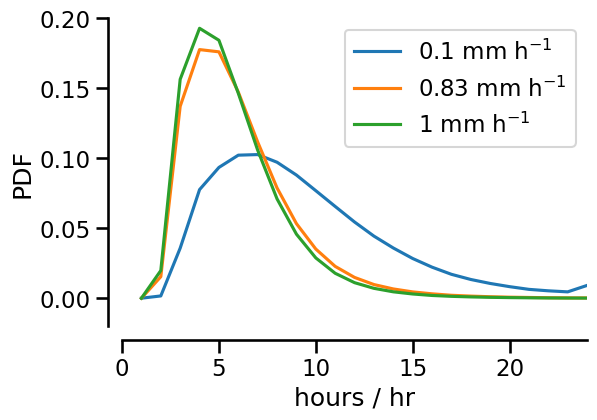

In [59]:
fig = plt.figure(figsize=(6, 4),facecolor='white')
sns.set_context("talk")
### Plot of the PDF of precipitation
ax = fig.add_subplot(111)
ax.plot(bin_edges[1:], precipitation_hours_pdf_20_70_01,label='0.1 mm h$^{-1}$')
ax.plot(bin_edges[1:], precipitation_hours_pdf_20_70_05,label='0.83 mm h$^{-1}$')
ax.plot(bin_edges[1:], precipitation_hours_pdf_20_70_1,label='1 mm h$^{-1}$')
plt.legend()
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.set_ylim([-0.02,0.2])
ax.set_xlim([0,24])
sns.despine(offset=10)
ax.set_xlabel('hours / hr')
ax.set_ylabel('PDF')
plt.savefig(
    '/scratch/m/m300876/results/daily_precip/pdf_hours_precipitation_20_70_mm.png',dpi=400,format='png',\
            bbox_inches='tight',orientation={'landscape'})

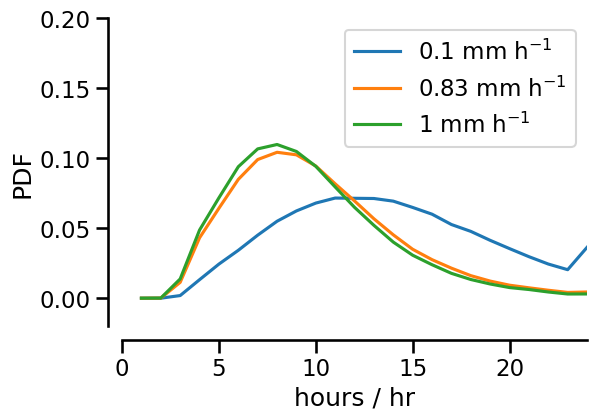

In [60]:
fig = plt.figure(figsize=(6, 4),facecolor='white')
sns.set_context("talk")
### Plot of the PDF of precipitation
ax = fig.add_subplot(111)
ax.plot(bin_edges[1:], precipitation_hours_pdf_70_01,label='0.1 mm h$^{-1}$')
ax.plot(bin_edges[1:], precipitation_hours_pdf_70_05,label='0.83 mm h$^{-1}$')
ax.plot(bin_edges[1:], precipitation_hours_pdf_70_1,label='1 mm h$^{-1}$')
plt.legend()
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.set_ylim([-0.02,0.2])
ax.set_xlim([0,24])
sns.despine(offset=10)
ax.set_xlabel('hours / hr')
ax.set_ylabel('PDF')
plt.savefig(
    '/scratch/m/m300876/results/daily_precip/pdf_hours_precipitation_more_70_mm.png',dpi=400,format='png',\
            bbox_inches='tight',orientation={'landscape'})

In [46]:
## day with precip > 20 mm d-1 and and < 70 mm d-1 hourly precip > than 0.1

In [47]:
pr_hourly_mask = (dset.pr.where((resam>=5) & (resam<20) & (dset.pr*3600>=0.1)))*3600

In [48]:
pr_hourly_count = (pr_hourly_mask*0+1).resample(time='1D').sum().compute()

In [49]:
precipitation_hours_pdf_5_20_01, bin_edges = np.histogram(pr_hourly_count.where(pr_hourly_count>0), 
                                                        bins=np.arange(0,25,1),density=True)

In [50]:
## day with precip > 20 mm d-1 and and < 70 mm d-1 hourly precip > than 0.83

In [51]:
pr_hourly_mask = (dset.pr.where((resam>=5) & (resam<20) & (dset.pr*3600>=0.83)))*3600

In [52]:
pr_hourly_count = (pr_hourly_mask*0+1).resample(time='1D').sum().compute()

In [53]:
precipitation_hours_pdf_5_20_05, bin_edges = np.histogram(pr_hourly_count.where(pr_hourly_count>0), 
                                                        bins=np.arange(0,25,1),density=True)

In [54]:
## day with precip > 20 mm d-1 and and < 70 mm d-1 hourly precip > than 1

In [55]:
pr_hourly_mask = (dset.pr.where((resam>=5) & (resam<20) & (dset.pr*3600>=1)))*3600

In [56]:
pr_hourly_count = (pr_hourly_mask*0+1).resample(time='1D').sum().compute()

In [57]:
precipitation_hours_pdf_5_20_1, bin_edges = np.histogram(pr_hourly_count.where(pr_hourly_count>0), 
                                                        bins=np.arange(0,25,1),density=True)

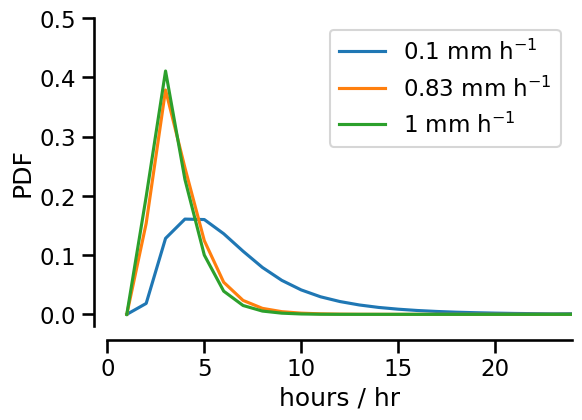

In [61]:
fig = plt.figure(figsize=(6, 4),facecolor='white')
sns.set_context("talk")
### Plot of the PDF of precipitation
ax = fig.add_subplot(111)
ax.plot(bin_edges[1:], precipitation_hours_pdf_5_20_01,label='0.1 mm h$^{-1}$')
ax.plot(bin_edges[1:], precipitation_hours_pdf_5_20_05,label='0.83 mm h$^{-1}$')
ax.plot(bin_edges[1:], precipitation_hours_pdf_5_20_1,label='1 mm h$^{-1}$')
plt.legend()
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.set_ylim([-0.02,0.5])
ax.set_xlim([0,24])
sns.despine(offset=10)
ax.set_xlabel('hours / hr')
ax.set_ylabel('PDF')
plt.savefig(
    '/scratch/m/m300876/results/daily_precip/pdf_hours_precipitation_5_20_mm.png',dpi=400,format='png',\
            bbox_inches='tight',orientation={'landscape'})